In [27]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split

from sklearn.impute import MissingIndicator, SimpleImputer

In [28]:
df = pd.read_csv('../../datasets/titanic-train-test/train.csv', usecols=['Age', 'Fare', 'Survived'])

df.sample(5)

,Survived,Age,Fare
138,0,16.0,9.2167
301,1,NaN,23.2500
135,0,23.0,15.0458
694,0,60.0,26.5500
454,0,NaN,8.0500


In [29]:
X = df.drop(columns=['Survived'])
y = df['Survived']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

X_train.sample(5)

,Age,Fare
237,8.0,26.2500
879,56.0,83.1583
214,NaN,7.7500
779,43.0,211.3375
736,48.0,34.3750


In [30]:
X_train['Age_imputed'] = X_train['Age']
X_test['Age_imputed'] = X_test['Age']

X_test.sample(5)

,Age,Fare,Age_imputed
692,NaN,56.4958,NaN
158,NaN,8.6625,NaN
386,1.0,46.9000,1.0
343,25.0,13.0000,25.0
614,35.0,8.0500,35.0


In [31]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
X_test['Age_imputed'][X_test['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_test['Age'].isnull().sum()).values

/tmp/ipykernel_17253/3090101260.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['Age_imputed'][X_train['Age_imputed'].isnull()] = X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values
/tmp/ipykernel_17253/309010126

In [32]:
X_train['Age_imputed'][X_train['Age_imputed'].isnull()]

Series([], Name: Age_imputed, dtype: float64)

In [33]:
X_train['Age'].dropna().sample(X_train['Age'].isnull().sum()).values

array([25.  , 22.  , 36.  , 36.  , 28.  , 20.  , 37.  ,  9.  , 35.  ,
       16.  , 35.  , 36.  , 30.  , 18.  , 29.  , 25.  , 42.  , 30.  ,
       54.  , 24.  , 29.  , 22.  , 24.  , 20.  , 47.  , 25.  , 49.  ,
       58.  , 29.  , 17.  , 30.  , 41.  , 24.  , 48.  , 52.  , 17.  ,
        3.  , 22.  , 33.  ,  2.  , 43.  , 27.  , 24.  , 23.  , 48.  ,
        3.  , 22.  , 24.  , 51.  , 24.  , 20.  , 46.  , 32.  , 28.  ,
       17.  , 54.  , 52.  , 30.  , 23.  , 24.  , 18.  , 28.5 , 41.  ,
       31.  , 47.  ,  0.42,  4.  , 31.  , 30.  , 34.  , 29.  , 24.  ,
       58.  , 32.5 ,  1.  , 24.  , 27.  ,  0.67, 58.  , 30.  , 54.  ,
       42.  , 25.  , 20.  , 61.  , 19.  , 20.  , 24.  , 16.  , 31.  ,
       19.  , 21.  , 18.  , 22.  , 24.  , 33.  , 28.  , 50.  , 49.  ,
       45.5 , 39.  , 47.  , 30.  , 25.  , 18.  ,  5.  , 45.  , 47.  ,
       21.  , 28.  , 39.  , 30.  , 35.  , 27.  , 34.  ,  4.  , 21.  ,
       28.  , 27.  , 45.  , 24.  , 19.  , 24.  , 22.  , 26.  , 20.  ,
       35.  , 21.  ,

In [34]:
X_train['Age'].isnull().sum()

148

/tmp/ipykernel_17253/2502487327.py:1: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age'], label='Original', hist=False)
/tmp/ipykernel_17253/2502487327.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train['Age_imputed'], label = 'Imputed', hist=False)


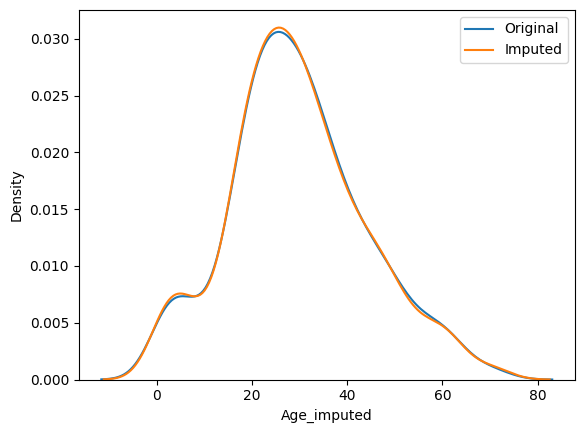

In [35]:
sns.distplot(X_train['Age'], label='Original', hist=False)
sns.distplot(X_train['Age_imputed'], label = 'Imputed', hist=False)

plt.legend()
plt.show()

In [36]:
print('Original variable variance: ', X_train['Age'].var())
print('Variance after random imputation: ', X_train['Age_imputed'].var())

Original variable variance:  204.34951339046142
Variance after random imputation:  205.39855519346858


In [37]:
X_train[['Fare', 'Age', 'Age_imputed']].cov()

,Fare,Age,Age_imputed
Fare,2368.246832,71.512440,50.402970
Age,71.512440,204.349513,204.349513
Age_imputed,50.402970,204.349513,205.398555


<Axes: >

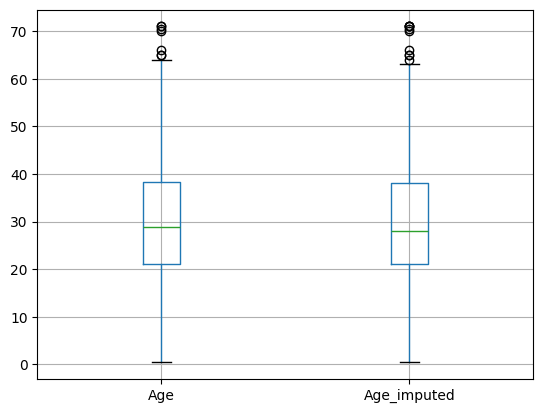

In [38]:
X_train[['Age', 'Age_imputed']].boxplot()

In [39]:
# sampled_value = X_train['Age'].dropna().sample(1, random_state=int(observation['Fare']))

In [40]:
# Categorical data

data = pd.read_csv('../../datasets/house-train.csv', usecols=['GarageQual', 'FireplaceQu', 'SalePrice'])

data.sample(5)

,FireplaceQu,GarageQual,SalePrice
547,NaN,TA,129500
729,NaN,TA,103000
696,NaN,TA,89000
834,NaN,TA,139950
1126,TA,TA,174000


In [41]:
data.isnull().mean() * 100

FireplaceQu    47.260274
GarageQual      5.547945
SalePrice       0.000000
dtype: float64

In [42]:
X = data
y = data['SalePrice']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=2)

In [43]:
X_train['GarageQual_imputed'] = X_train['GarageQual']
X_test['GarageQual_imputed'] = X_test['GarageQual']

X_train['FireplaceQu_imputed'] = X_train['FireplaceQu']
X_test['FireplaceQu_imputed'] = X_test['FireplaceQu']

In [44]:
X_train.sample(5)

,FireplaceQu,GarageQual,SalePrice,GarageQual_imputed,FireplaceQu_imputed
359,TA,TA,280000,TA,TA
838,NaN,TA,144000,TA,NaN
473,Ex,TA,440000,TA,Ex
1337,NaN,NaN,52500,NaN,NaN
391,TA,TA,215000,TA,TA


In [45]:
X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
X_test['GarageQual_imputed'][X_test['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_test['GarageQual'].isnull().sum()).values

X_train['FireplaceQu_imputed'][X_train['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_train['FireplaceQu'].isnull().sum()).values
X_test['FireplaceQu_imputed'][X_test['FireplaceQu_imputed'].isnull()] = X_train['FireplaceQu'].dropna().sample(X_test['FireplaceQu'].isnull().sum()).values

/tmp/ipykernel_17253/856878696.py:1: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer, "col"] = values` instead, to perform the assignment in a single step and ensure this keeps updating the original `df`.

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy

  X_train['GarageQual_imputed'][X_train['GarageQual_imputed'].isnull()] = X_train['GarageQual'].dropna().sample(X_train['GarageQual'].isnull().sum()).values
/tm

In [46]:
temp = pd.concat([
    X_train['GarageQual'].value_counts() / len(X_train['GarageQual'].dropna()),
    X_train['GarageQual_imputed'].value_counts() / len(X_train)
], axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
TA,0.951043,0.949486
Fa,0.037171,0.039384
Gd,0.009973,0.009418
Po,0.000907,0.000856
Ex,0.000907,0.000856


In [47]:
temp = pd.concat([
    X_train['FireplaceQu'].value_counts() / len(X_train['FireplaceQu'].dropna()),
    X_train['FireplaceQu_imputed'].value_counts() / len(df)
], axis=1)

temp.columns = ['original', 'imputed']

temp

,original,imputed
Gd,0.494272,0.648709
TA,0.412439,0.543210
Fa,0.040917,0.049383
Po,0.027823,0.037037
Ex,0.024550,0.032548


/tmp/ipykernel_17253/1854357960.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)


/tmp/ipykernel_17253/1854357960.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
/tmp/ipykernel_17253/1854357960.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['Firepla

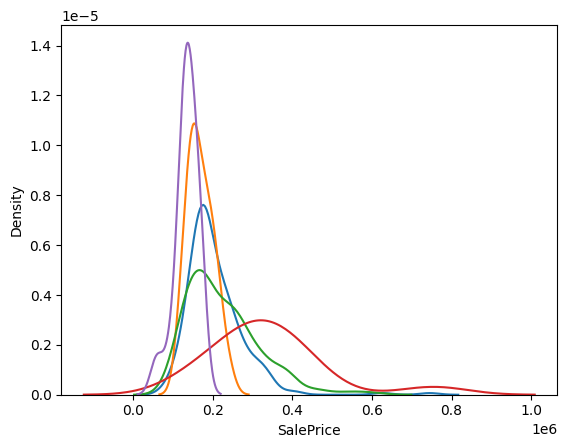

In [48]:
for category in X_train['FireplaceQu'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu'] == category]['SalePrice'], hist=False, label=category)
plt.show()

/tmp/ipykernel_17253/595441350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist=False, label=category)
/tmp/ipykernel_17253/595441350.py:2: UserWarning: 

`distplot` is a deprecated function and will be removed in seaborn v0.14.0.

Please adapt your code to use either `displot` (a figure-level function with
similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).

For a guide to updating your code to use the new functions, please see
https://gist.github.com/mwaskom/de44147ed2974457ad6372750bbe5751

  sns.distplot(X_train[X_train['F

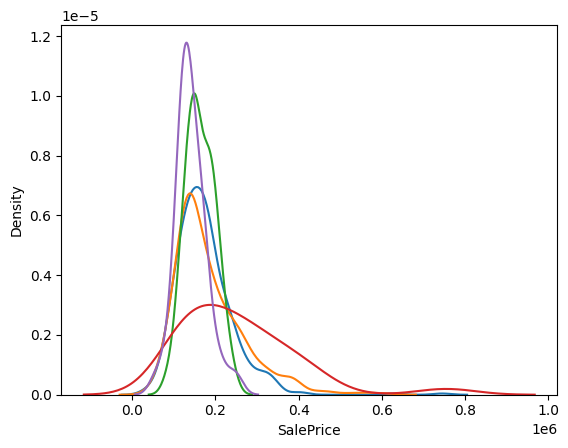

In [49]:
for category in X_train['FireplaceQu_imputed'].dropna().unique():
    sns.distplot(X_train[X_train['FireplaceQu_imputed'] == category]['SalePrice'], hist=False, label=category)
plt.show()